## Differentialgleichungen 1. und 2. Ordnung

### Trennung der Veränderlichen

In [8]:
from sympy import *
from sympy import Derivative as d
init_printing()

In [115]:
y=Function('y')
x=Symbol('x')
z=Symbol('z')

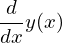

In [116]:
d(y(x),x)

In [117]:
integrate(x**2*cos(x))

In [118]:
form=d(y(x),x)-E**(y(x)-x)

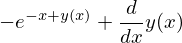

In [119]:
form

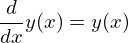

In [120]:
form=Eq(d(y(x),x),y(x))
form

In [121]:
sol=dsolve(form,y(x))

In [122]:
sol

In [123]:
k=symbols('k');

f2=Eq(d(y(x),x),k*y(x))

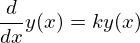

In [124]:
f2

In [125]:
dsolve(f2)

In [126]:
f3=Eq((3*x**2)/E**y(x),d(y(x),x))

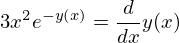

In [127]:
f3

In [128]:
dsolve(f3)

In [135]:
integrate(exp(x),x)

In [154]:
y=symbols('y')
integrate(3*y**2,y)


#### Trennung der Veranderlichen

In [183]:
from sympy import *
from sympy import Derivative as d
init_printing()

In [184]:
x=Symbol('x')
y=Symbol('y')

In [185]:
gleichung=Eq(d(y(x)),3*x**2/E**y(x))

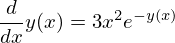

In [186]:
gleichung

$$ \frac{dx}{dy}=3x^2e^{-y(x)} $$
$$ e^ydy=3x^2dx $$

In [187]:
integrate(E**y,y)

In [188]:
integrate(3*x**2,x)

In [189]:
y=Function('y')
c=Symbol('c')
fin=Eq(E**y(x),x**3+c)
fin

In [190]:
solve(fin,y(x))

Controllieren wir die erfolg:

In [191]:
dsolve(gleichung)

### Integrations Faktor

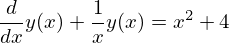

In [216]:
y=Function('y')
c=Symbol('c')
x=Symbol('x')

gl=Eq(d(y(x))+y(x)/x,x**2+4)
gl

Integrationsfaktor:

In [217]:
ifa=E**(integrate(1/x,x))
ifa

Nach Transofrmierungen wir kriegen:
$$(xy)'=x*(x^2+4)$$
$$(xy)'=(x^3+4x)$$
Wir integrieren beide Seiten:
$$\int{(xy)'}=xy$$

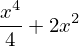

In [245]:
ii=integrate((x**3+4*x),x)
ii

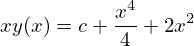

In [246]:
ii=ii+c #integration

iii=Eq(x*y(x),ii)
iii

Wir teilen beide Seiten nach x:

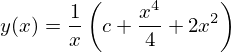

In [247]:
ii=ii/x;
iiii=Eq(y(x),ii)
iiii

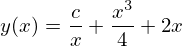

In [252]:
iiii=simplify(iiii)
iiii

Uberprufen wir das :

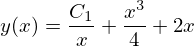

In [253]:
auto=dsolve(gl)
auto

In [254]:
auto==iiii

False